# Polynomial Regression

In [31]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("data/advertising.csv")

In [33]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [34]:
X = data.drop(columns=["Sales"])
Y = data["Sales"]

In [35]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


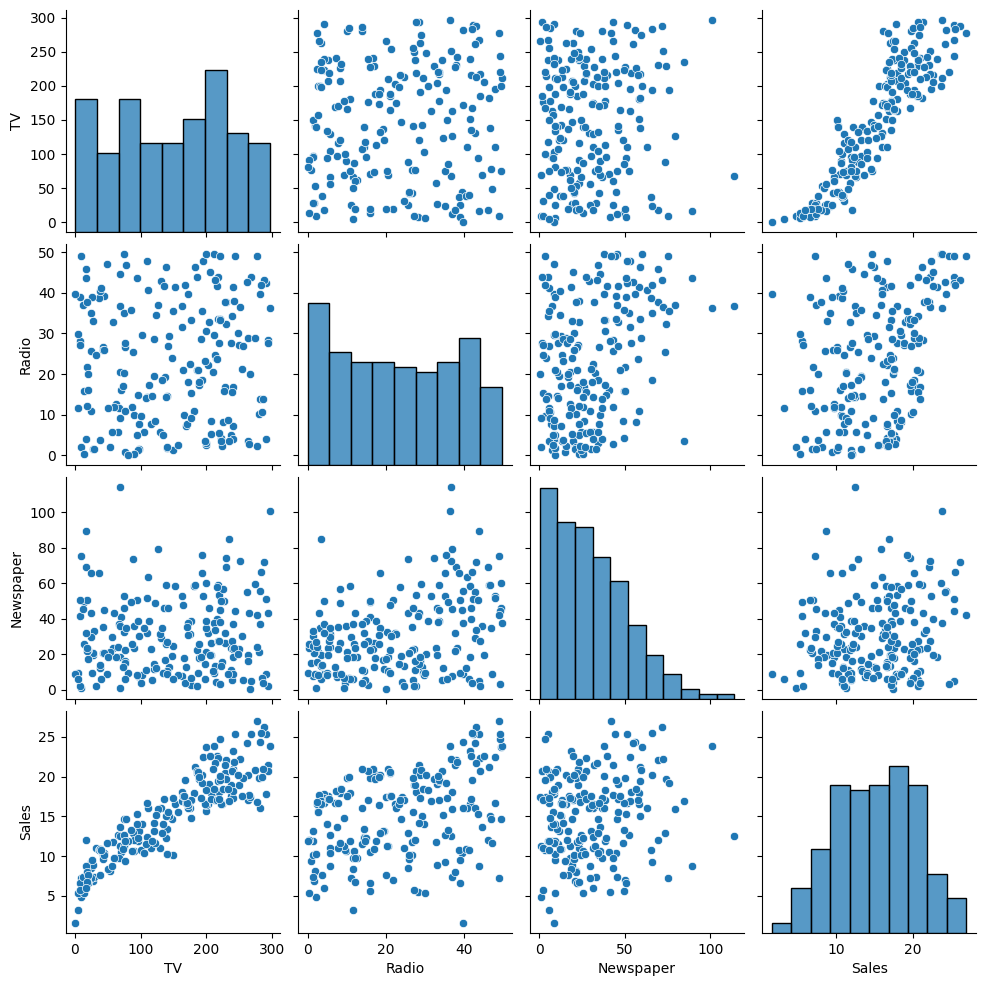

In [36]:
sns.pairplot(data)

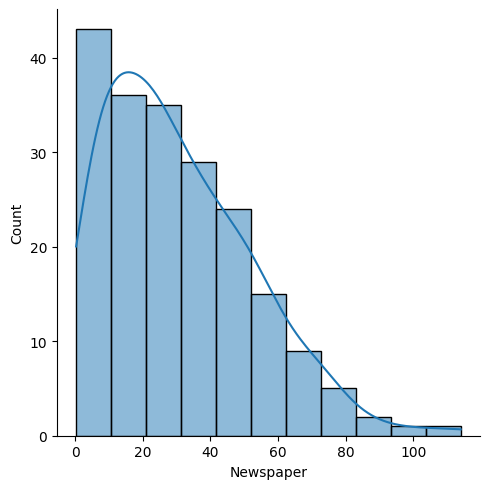

In [37]:
sns.displot(data = data , x = "Newspaper" , kde = True)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_converter = PolynomialFeatures(degree=2 , include_bias=False)

In [40]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [41]:
poly_features = poly_converter.transform(X)

In [42]:
poly_features.shape

(200, 9)

In [43]:
X.shape

(200, 3)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train , X_test , Y_train , Y_test = train_test_split(poly_features,  Y , random_state = 42)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
regressor = LinearRegression()


In [48]:
regressor.fit(X_train , Y_train)

LinearRegression()

In [49]:
Y_pred = regressor.predict(X_test)

In [50]:
regressor.score(X_test , Y_test)

0.9485618659991271

In [51]:
regressor.score(X_train , Y_train)

0.9276607239475623

In [52]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [53]:
mean_squared_error(Y_test , Y_pred)

1.3983199537467308

In [54]:
np.sqrt(mean_squared_error(Y_test , Y_pred)) ## RMSE

1.1825057943818842

In [55]:
mean_absolute_error(Y_test , Y_pred)

0.8988824589775721

In [70]:
train_rmse_error = []
test_rmse_error = []


for d in range(1 , 11):

    poly_converter = PolynomialFeatures(degree = d , include_bias= False)
    poly_features = poly_converter.fit_transform(X)

    X_train , X_test , Y_train , Y_test = train_test_split(poly_features,  Y , random_state = 101)
    
    regressor = LinearRegression()
    regressor.fit(X_train , Y_train)

    Y_pred_test = regressor.predict(X_test)
    Y_pred_train = regressor.predict(X_train)

    test_rmse_error.append(np.sqrt(mean_squared_error(Y_test  ,Y_pred_test)))
    train_rmse_error.append(np.sqrt(mean_squared_error(Y_train , Y_pred_train)))


    


In [71]:
test_rmse_error

[1.67815805811097,
 1.4626745596190505,
 1.4633491880206482,
 1.8956497402889432,
 1.6917362221214929,
 38.102604335012145,
 74.02275460889187,
 10968.627058893611,
 157125.06206052125,
 676082.2823643982]

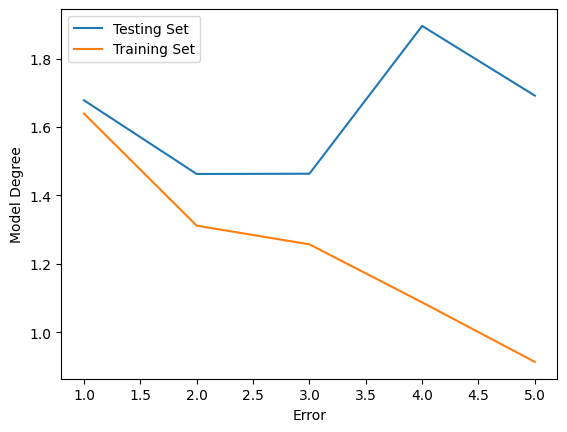

In [72]:
sns.lineplot(x = range(1 , 6) , y = test_rmse_error[:5] , label = "Testing Set")
sns.lineplot(x  = range(1 , 6) , y = train_rmse_error[:5] , label = "Training Set")
plt.xlabel("Error")
plt.ylabel("Model Degree")
plt.legend()
plt.show()

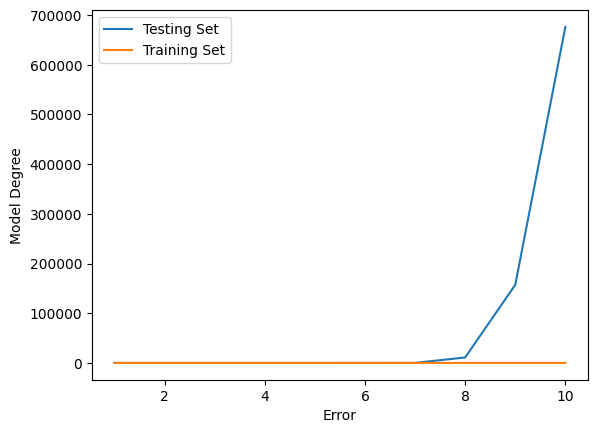

In [73]:
sns.lineplot(x = range(1 , 11) , y = test_rmse_error , label = "Testing Set")
sns.lineplot(x  = range(1 , 11) , y = train_rmse_error , label = "Training Set")
plt.xlabel("Error")
plt.ylabel("Model Degree")
plt.legend()
plt.show()

From the above we can conclude that model with degree 2 is optimal

In [74]:
final_poly_converter = PolynomialFeatures(degree = 2 , include_bias= False)
final_poly_features = final_poly_converter.fit_transform(X)
final_model = LinearRegression()
final_model.fit(final_poly_features , Y)

LinearRegression()

In [76]:
from joblib import dump , load

In [77]:
dump(final_model , "Models/poly.h5")

['Models/poly.h5']